In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import os

In [ ]:
data=pd.read_excel(r"D:\Crudeoil price prediction\Crude Oil Prices Daily.xlsx")
data.head()

,Date,Closing Value
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87


In [ ]:
data.isnull().any()

Date             False
Closing Value     True
dtype: bool

In [ ]:
data.isnull().sum()

Date             0
Closing Value    7
dtype: int64

In [ ]:
data.dropna(axis=0,inplace=True)

In [ ]:
data=data.reset_index()['Closing Value']

In [ ]:
data.head()

0    25.56
1    26.00
2    26.53
3    25.85
4    25.87
Name: Closing Value, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data=scaler.fit_transform(np.array(data).reshape(-1,1))

In [ ]:
data

array([[0.11335703],
       [0.11661484],
       [0.12053902],
       ...,
       [0.46497853],
       [0.47038353],
       [0.47149415]])

In [ ]:
len(data)

8216

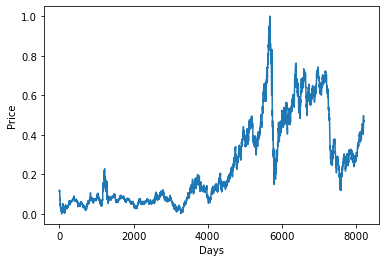

In [ ]:
plt.plot(data)
plt.xlabel("Days")
plt.ylabel("Price")
plt.show()

In [ ]:
training_size=int(len(data)*0.80)
testing_size=len(data)-training_size
train_data,test_data=data[0:training_size],data[training_size:len(data)]

In [ ]:
train_data.shape
len(test_data)

1644

In [ ]:
def create_dataset(dataset,timestep):
    dataX,dataY=[],[]
    for i in range(len(dataset)-timestep-1):
        a=dataset[i:(i+timestep),0]
        dataX.append(a)
        dataY.append(dataset[i+timestep,0])
    return np.array(dataX),np.array(dataY)

In [ ]:
time_step=10
x_train,y_train=create_dataset(train_data,time_step)
x_test,y_test=create_dataset(test_data,time_step)


In [ ]:
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)

In [ ]:
print(x_train.shape)
print(y_test.shape)

(6561, 10)
(1633, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()

In [ ]:
model.add(LSTM(50,return_sequences=True,input_shape=(10,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))

In [ ]:
model.add(Dense(1))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 10, 50)            10400     
                                                                 
 lstm_4 (LSTM)               (None, 10, 50)            20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50,batch_size=64,verbose=1)

Epoch 1/50
103/103 [==============================] - 11s 36ms/step - loss: 0.0057 - val_loss: 4.3634e-04
Epoch 2/50
103/103 [==============================] - 2s 21ms/step - loss: 3.5613e-04 - val_loss: 4.3645e-04
Epoch 3/50
103/103 [==============================] - 2s 20ms/step - loss: 3.3533e-04 - val_loss: 5.4420e-04
Epoch 4/50
103/103 [==============================] - 2s 20ms/step - loss: 3.4572e-04 - val_loss: 6.7273e-04
Epoch 5/50
103/103 [==============================] - 2s 20ms/step - loss: 3.3690e-04 - val_loss: 4.4779e-04
Epoch 6/50
103/103 [==============================] - 2s 21ms/step - loss: 3.3063e-04 - val_loss: 4.3494e-04
Epoch 7/50
103/103 [==============================] - 2s 21ms/step - loss: 3.3418e-04 - val_loss: 3.8758e-04
Epoch 8/50
103/103 [==============================] - 2s 20ms/step - loss: 3.0717e-04 - val_loss: 3.4249e-04
Epoch 9/50
103/103 [==============================] - 2s 21ms/step - loss: 3.1058e-04 - val_loss: 4.1184e-04
Epoch 10/50
103/103 [=

In [ ]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

52/52 [==============================] - 0s 6ms/step


In [ ]:
train_predict=scaler.inverse_transform(train_predict)
y_train=scaler.inverse_transform(y_train)
test_predict=scaler.inverse_transform(test_predict)
y_test=scaler.inverse_transform(y_test)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1.201985203053853

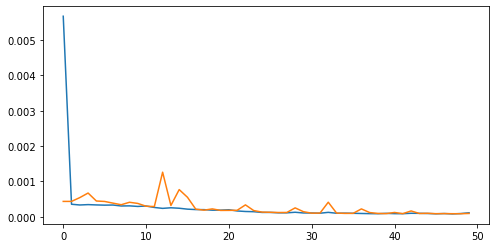

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'],label='Train loss')
plt.plot(history.history['val_loss'],label='Test loss')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model.save("crude_oil_forecasting.h5")

KeyboardInterrupt: ignored

In [23]:
# Saving in tar

!tar -zcvf crude_oil.tgz crude_oil_forecasting.h5

crude_oil_forecasting.h5


In [24]:
!pip install watson-machine-learning-client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
!pip install ibm_watson_machine_learning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
from ibm_watson_machine_learning import APIClient

wml_credentials ={
    "url":"https://eu-gb.ml.cloud.ibm.com",
    "apikey":API_KEY
}

client = APIClient(wml_credentials)
client

Python 3.7 and 3.8 frameworks are deprecated and will be removed in a future release. Use Python 3.9 framework instead.


In [27]:
client.spaces.get_details()

{'resources': [{'entity': {'compute': [{'crn': 'crn:v1:bluemix:public:pm-20:eu-gb:a/4b4ebceb17154417ad527011c75a3401:32fb3b9a-07c4-4368-a112-20f6c2a5aca4::',
      'guid': '32fb3b9a-07c4-4368-a112-20f6c2a5aca4',
      'name': 'Watson Machine Learning-wr',
      'type': 'machine_learning'}],
    'description': '',
    'name': 'Crude oil prediction',
    'scope': {'bss_account_id': '4b4ebceb17154417ad527011c75a3401'},
    'stage': {'production': False},
    'status': {'state': 'active'},
    'storage': {'properties': {'bucket_name': '27dc9851-f231-4d75-96e1-5bd5dc360ee4',
      'bucket_region': 'eu-gb-standard',
      'credentials': {'admin': {'access_key_id': 'd3aa07eb62514afa965dac9285c7eeb3',
        'api_key': 'mTXV7BaxNwsgCChaxNcRsJvLLJh2d2hVC7e5VLDrjzMS',
        'secret_access_key': '23b47bf399a48870733a11fee5b3efb497490c9199a9a236',
        'service_id': 'ServiceId-406026ab-3f1d-4854-b5d8-3880c9a53284'},
       'editor': {'access_key_id': '3df4c1fba43d489da9bc55f703690ec5',
     

In [28]:
def guid_space_name(client,crudeoil):
  space = client.spaces.get_details()
  return(next(item for item in space['resources'] if item['entity']['name']==crudeoil)['metadata']['id'])

space_uid = guid_space_name(client,'Crude oil prediction')
space_uid

'3967ab9d-05b8-4cf0-a292-b9d11c7dd6f3'

In [29]:
client.set.default_space(space_uid)

'SUCCESS'

In [30]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [31]:
software_space_uid = client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [32]:
model_details = client.repository.store_model(model='crude_oil.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"Crude oil prediction",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})

In [33]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'software_spec': {'id': 'acd9c798-6974-5d2f-a657-ce06e986df4d',
   'name': 'tensorflow_rt22.1-py3.9'},
  'type': 'tensorflow_2.7'},
 'metadata': {'created_at': '2022-11-18T09:11:01.739Z',
  'id': '08f94720-55f0-4384-84f9-90a59d0484a4',
  'modified_at': '2022-11-18T09:11:04.747Z',
  'name': 'Crude oil prediction',
  'owner': 'IBMid-6620043UYJ',
  'resource_key': '15685dce-edc7-419d-8740-f56a1089e4d9',
  'space_id': '3967ab9d-05b8-4cf0-a292-b9d11c7dd6f3'},
 'system': {'warnings': []}}

In [34]:
model_id = client.repository.get_model_id(model_details)
model_id

'08f94720-55f0-4384-84f9-90a59d0484a4'

In [36]:
client.repository.download(model_id,'fetch.tar.gz')

Successfully saved model content to file: 'fetch.tar.gz'


'/content/fetch.tar.gz'